In [10]:
import numpy as np
import pandas as pd
import json
import os

## Load latest execution full

In [11]:
full = pd.read_csv("Full/full_3.csv", index_col=0)
full = full.drop(['dram_read_bytes (dev_approximate_gravity)'], axis=1, errors='ignore')

/tmp/ipykernel_654118/1990568059.py:1: DtypeWarning: Columns (58,76,78,100,153) have mixed types. Specify dtype option on import or set low_memory=False.
  full = pd.read_csv("Full/full_3.csv", index_col=0)


## Load selected Profiling features

In [12]:
selected_features = ['gld_transactions (dev_approximate_gravity)',
 'thread_inst_executed (dev_approximate_gravity)',
 'inst_compute_ld_st (correct_particles)',
 'active_warps_pm (correct_particles)',
 'global_store_requests (correct_particles)']

## Training tests

### test 1: intermediate model (Dtree->Dtree)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

# Split data for intermediate model training
X = full[input_features]
y_high_variance = full[selected_features]

# Train an intermediate model for each high-variance feature
intermediate_model = DecisionTreeRegressor()  # Using Linear Regression as an example
intermediate_model.fit(X, y_high_variance)

In [ ]:
# Generate high-variance feature predictions from the intermediate model
predicted_high_variance = intermediate_model.predict(X)
predicted_high_variance_df = pd.DataFrame(predicted_high_variance, columns=selected_features)

# Combine core features with the predicted high-variance features for main model training
X_full = pd.concat([X, predicted_high_variance_df], axis=1)
y_exec_time = full['exec_time_avg']

# Split data for main model training
X_train, X_test, y_train, y_test = train_test_split(X_full, y_exec_time, test_size=0.2, random_state=42)

# Train the main model with both core and high-variance features
main_model = DecisionTreeRegressor(random_state=42)
main_model.fit(X_train, y_train)


In [ ]:
# Predict high-variance features from the core input features in the test set
predicted_high_variance_test = intermediate_model.predict(X_test[input_features])
predicted_high_variance_test_df = pd.DataFrame(predicted_high_variance_test, columns=selected_features)

# Combine core inputs and predicted high-variance features for the final prediction
X_test_full = pd.concat([X_test[input_features].reset_index(drop=True), predicted_high_variance_test_df.reset_index(drop=True)], axis=1)

# Make final predictions
y_pred = main_model.predict(X_test_full)

# Display the results
results_df = pd.DataFrame({
    'N': X_test['N'],
    'theta': X_test['theta'],
    'dt': X_test['dt'],
    'Multiprocessors (SMs)': X_test['Multiprocessors (SMs)'],
    'Total Cores': X_test['Total Cores'],
    'L2 Cache Size (KB)': X_test['L2 Cache Size (KB)'],
    'y_pred': y_pred,
    'y_test': y_test
})

from sklearn.metrics import mean_absolute_percentage_error
# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")

print(results_df.to_csv())


### Test2: Direct model (sim + gpu, no high variance features)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

# Split data for intermediate model training
X_full = full[input_features]
y_exec_time = full['exec_time_avg']

# Split data for main model training
X_train, X_test, y_train, y_test = train_test_split(X_full, y_exec_time, test_size=0.2, random_state=42)

# Train the main model with both core and high-variance features
main_model = DecisionTreeRegressor(random_state=42)
main_model.fit(X_train, y_train)

# Make final predictions
y_pred = main_model.predict(X_test)

# Display the results
results_df = pd.DataFrame({
    'N': X_test['N'],
    'theta': X_test['theta'],
    'dt': X_test['dt'],
    'Multiprocessors (SMs)': X_test['Multiprocessors (SMs)'],
    'Total Cores': X_test['Total Cores'],
    'L2 Cache Size (KB)': X_test['L2 Cache Size (KB)'],
    'y_pred': y_pred,
    'y_test': y_test
})

from sklearn.metrics import mean_absolute_percentage_error
# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")

print(results_df.to_csv())


### Test3: Direct model (sim + gpu, no high variance features)

In [ ]:
selected_features

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import svm


# Split data for intermediate model training
X_full = full[input_features]
y_exec_time = full['exec_time_avg']

# Split data for main model training
X_train, X_test, y_train, y_test = train_test_split(X_full, y_exec_time, test_size=0.2, random_state=42)

# Train the main model with both core and high-variance features
main_model = DecisionTreeRegressor(random_state=42)
# main_model = LinearRegression() # Linear Kernel
main_model.fit(X_train, y_train)

# Make final predictions
y_pred = main_model.predict(X_test)

# Display the results
results_df = pd.DataFrame({
    'N': X_test['N'],
    'theta': X_test['theta'],
    'dt': X_test['dt'],
    'Multiprocessors (SMs)': X_test['Multiprocessors (SMs)'],
    'Total Cores': X_test['Total Cores'],
    'L2 Cache Size (KB)': X_test['L2 Cache Size (KB)'],
    'y_pred': y_pred,
    'y_test': y_test
})

from sklearn.metrics import mean_absolute_percentage_error
# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")

print(results_df.to_csv())


### Test 4: Multitask learning output using min, max and avg

In [4]:
# print(y_full.to_csv())

In [ ]:
input_features

In [ ]:
gpu_params

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_comp():
    # Convert y_test and y_pred to DataFrames for easy plotting
    y_test_df = pd.DataFrame(y_test, columns=['exec_time_avg', 'exec_time_max', 'exec_time_min']).reset_index(drop=True)
    y_pred_df = pd.DataFrame(y_pred, columns=['exec_time_avg_pred', 'exec_time_max_pred', 'exec_time_min_pred'])

    # Reset index for test groups to match with y_test
    test_groups = groups.iloc[test_index].reset_index(drop=True)

    # Generate color mapping for each unique GPU name
    unique_gpus = test_groups.unique()
    palette = sns.color_palette("husl", len(unique_gpus))
    color_map = dict(zip(unique_gpus, palette))

    # Map colors for each GPU in the test set
    colors = test_groups.map(color_map)

    # Plot comparisons for each target variable
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle("Comparison of Actual vs Predicted Values (Color-coded by GPU)")

    target_names = ['exec_time_avg', 'exec_time_max', 'exec_time_min']
    for i, target in enumerate(target_names):
        scatter = axes[i].scatter(y_test_df[target], y_pred_df[f"{target}_pred"], c=colors, alpha=0.6)
        axes[i].plot([y_test_df[target].min(), y_test_df[target].max()],
                    [y_test_df[target].min(), y_test_df[target].max()], 'r--')  # Reference line
        axes[i].set_xlabel("Actual Values")
        axes[i].set_ylabel("Predicted Values")
        axes[i].set_title(f"{target} (Actual vs Predicted)")
        axes[i].grid(True)

    # Create a legend for GPU names
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[gpu], markersize=10) for gpu in unique_gpus]
    labels = unique_gpus
    fig.legend(handles, labels, title="GPU Name", loc="upper right")

    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()


In [ ]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import pandas as pd

# Define input and target variables
X_full = full[selected_features]

a= ['N','theta','dt',
#  'Compute Capability',
#  'Total Memory (MB)',
 'Multiprocessors (SMs)',
 'Max Threads Per SM',
#  'Total Cores',
#  'Warp Size',
#  'Max Threads Per Block',
#  'Max Blocks Per SM',
#  'Shared Memory Per Block (KB)',
#  'Shared Memory Per SM (KB)',
#  'Registers Per Block',
#  'Registers Per SM',
#  'L1 Cache Size (KB)',
 'L2 Cache Size (KB)',
#  'Memory Bus Width (bits)',
#  'Memory Bandwidth (GB/s)',
#  'Clock Rate (MHz)',
 'Warps Per SM',
 'Blocks Per SM',
#  'Half Precision FLOP/s',
#  'Single Precision FLOP/s',
#  'Double Precision FLOP/s',
#  'Concurrent Kernels',
#  'Threads Per Warp',
#  'Global Memory Bandwidth (GB/s)',
#  'Global Memory Size (MB)',
#  'L2 Cache Size',
#  'Memcpy Engines'
 ]

y_full = full[['exec_time_avg', 'exec_time_max', 'exec_time_min']]  # Multi-output target

# Split data for main model training
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

# Train the main model with MultiOutputRegressor
base_model = DecisionTreeRegressor(random_state=42)
main_model = MultiOutputRegressor(base_model)
main_model.fit(X_train, y_train)

# Make predictions for each target (exec_time_avg, exec_time_max, exec_time_min)
y_pred = main_model.predict(X_test)

# Convert y_test and y_pred to DataFrames for easy comparison
y_test_df = pd.DataFrame(y_test, columns=['exec_time_avg', 'exec_time_max', 'exec_time_min']).reset_index(drop=True)
y_pred_df = pd.DataFrame(y_pred, columns=['exec_time_avg_pred', 'exec_time_max_pred', 'exec_time_min_pred'])

# Display the results alongside input features
results_df = pd.concat([X_test.reset_index(drop=True), y_test_df, y_pred_df], axis=1)

# Calculate MAPE for each output
mape_avg = mean_absolute_percentage_error(y_test_df['exec_time_avg'], y_pred_df['exec_time_avg_pred'])
mape_max = mean_absolute_percentage_error(y_test_df['exec_time_max'], y_pred_df['exec_time_max_pred'])
mape_min = mean_absolute_percentage_error(y_test_df['exec_time_min'], y_pred_df['exec_time_min_pred'])

print(f"Mean Absolute Percentage Error (MAPE) - exec_time_avg: {mape_avg:.4f}")
print(f"Mean Absolute Percentage Error (MAPE) - exec_time_max: {mape_max:.4f}")
print(f"Mean Absolute Percentage Error (MAPE) - exec_time_min: {mape_min:.4f}")

# Export results to CSV (optional)
# print(results_df.to_csv(index=False))
plot_comp()


In [ ]:
# N,theta,dt,Multiprocessors (SMs),Max Threads Per SM,L2 Cache Size (KB),Warps Per SM,Blocks Per SM,


main_model.predict([[1000000,0.2,6.25e-05,40,1024,4096,32,16]])

In [ ]:
df_scaled = np.log1p(full[input_features].apply(pd.to_numeric, errors='coerce'))  # Use log1p to avoid issues with zero values (log(x+1))

# Step 2: Normalization (scaling between 0 and 1)
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_scaled), columns=df_scaled.columns)

# print(df_normalized.to_csv())

In [ ]:
from sklearn.model_selection import GroupKFold, cross_val_score
from sklearn.multioutput import MultiOutputRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.utils import resample
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import make_scorer, mean_absolute_percentage_error, mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np

# input_features = [
#  'N',
#  'theta',
#  'dt',
#  'Multiprocessors (SMs)',
#  'Max Threads Per SM',
# #  'L2 Cache Size (KB)',
#  'Warps Per SM',
# #  'Blocks Per SM',

# #  'Compute Capability',
# #  'Total Memory (MB)',
# #  'Total Cores',
# #  'Warp Size',
# #  'Max Threads Per Block',
# #  'Max Blocks Per SM',
# #  'Shared Memory Per Block (KB)',
# #  'Shared Memory Per SM (KB)',
# #  'Registers Per Block',
# #  'Registers Per SM',
# #  'L1 Cache Size (KB)',
# #  'Memory Bus Width (bits)',
# #  'Memory Bandwidth (GB/s)',
# #  'Clock Rate (MHz)',
# #  'Half Precision FLOP/s',
# #  'Single Precision FLOP/s',
# #  'Double Precision FLOP/s',
# #  'Concurrent Kernels',
# #  'Threads Per Warp',
# #  'Global Memory Bandwidth (GB/s)',
# #  'Global Memory Size (MB)',
# #  'L2 Cache Size',
# #  'Memcpy Engines'
#  ] #+ selected_features
input_features = ['N', 'theta', 'Half Precision FLOP/s', 'Single Precision FLOP/s', 'Double Precision FLOP/s']

# input_features = ['N', 'gld_transactions (dev_approximate_gravity)',
#  'thread_inst_executed (dev_approximate_gravity)',
#  'inst_compute_ld_st (correct_particles)',
#  'global_store_requests (correct_particles)']
# output_features = ['exec_time_avg', 'exec_time_max', 'exec_time_min']
output_features = ['exec_time_avg']

df_scaled = np.log1p(full[input_features].apply(pd.to_numeric, errors='coerce'))  # Use log1p to avoid issues with zero values (log(x+1))

# Step 2: Normalization (scaling between 0 and 1)
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_scaled), columns=df_scaled.columns)


# Define input and target variables
# input_features = ['N', 'theta', 'dt', 'Multiprocessors (SMs)', 'Total Cores', 'L2 Cache Size (KB)']
# X_full = df_normalized[input_features]
sample_full = full #resample(full, n_samples=1000)
X_full = sample_full[input_features]
y_full = sample_full[output_features] # Multi-output target

# y_full = np.log10(full[['exec_time_avg', 'exec_time_max', 'exec_time_min']]) # Multi-output target
groups = sample_full['Name']  # Group by GPU name
# Apply square root transformation

# Initialize the model
# base_model = DecisionTreeRegressor(random_state=42) #,max_depth=15,max_features=1,max_leaf_nodes=None, min_samples_leaf=4, min_samples_split=2)
# Best MAPE Score: 0.3368 , 0.2495

# base_model = SVR(kernel='rbf', C=0.001, epsilon=0.000001)  # You can tune 'C' and 'epsilon' for performance


# base_model = LinearRegression()
base_model = RandomForestRegressor(random_state = 42, bootstrap=True,max_depth=10,max_features=1)
main_model = MultiOutputRegressor(base_model)
# main_model = base_model

# Setup GroupKFold
group_kfold = GroupKFold(n_splits=groups.nunique())  # Define the number of splits

# Cross-validation with grouped folds
scores = []
for fold, (train_index, test_index) in enumerate(group_kfold.split(X_full, y_full, groups=groups), start=1):
    
    X_train, X_test = X_full.iloc[train_index], X_full.iloc[test_index]
    y_train, y_test = y_full.iloc[train_index], y_full.iloc[test_index]
    y_train_root = np.power(y_train,(1/1))

    # Fit the model on the training set
    main_model.fit(X_train, y_train_root)
    
    # Predict on the test set
    y_pred_root = main_model.predict(X_test)
    y_pred = np.power(y_pred_root,1)
    
    y_test_df = pd.DataFrame(y_test, columns=output_features)
    y_pred_df = pd.DataFrame(y_pred, columns=output_features)

    # print(y_test_df)
    fold_mape = mean_absolute_percentage_error(y_test,y_pred)
    mape_avg = mean_absolute_percentage_error(y_test_df['exec_time_avg'], y_pred_df['exec_time_avg'])
    # mse_avg = mean_squared_error(y_test_df['exec_time_avg'], y_pred_df['exec_time_avg'])
    # mae_avg = mean_absolute_error(y_test_df['exec_time_avg'], y_pred_df['exec_time_avg'])
    # mape_min = 0# mean_absolute_percentage_error(y_test_df['exec_time_min'], y_pred_df['exec_time_min'])
    # mape_max = 0# mean_absolute_percentage_error(y_test_df['exec_time_max'], y_pred_df['exec_time_max'])
    
    scores.append(fold_mape)
    
    # Print the GPU names in the test set and the MAPE for this fold
    test_gpus = groups.iloc[test_index].unique()
    print(f"Fold {fold}: Test GPUs = {test_gpus}")
    print(f"Fold {fold}: MAPE = avg: {mape_avg:.4f}")
    # plot_comp()

# Calculate the average MAPE across folds
average_mape = np.mean(scores)
# print(scores)
print(f"Cross-Validated Mean Absolute Percentage Error (MAPE): {average_mape:.4f}")


In [ ]:
input_features = ['N', 'theta', 'Multiprocessors (SMs)','Half Precision FLOP/s', 'Single Precision FLOP/s', 
                  'Double Precision FLOP/s']
output_features = selected_features[0]

X_full = full[input_features]
# X_full['N_logN'] = full['N'] * np.log(full['N'])
y_full = np.power(full[output_features],1/2)

X_train, X_test, y_train, y_test, groups_train, groups_val = train_test_split(
    X_full, y_full, groups, test_size=0.2, random_state=42 #, stratify=groups
)

from sklearn.kernel_ridge import KernelRidge
# intermediate_model = KernelRidge(kernel='rbf', alpha=1.0)
from sklearn.ensemble import GradientBoostingRegressor
intermediate_model = GradientBoostingRegressor(max_depth=3,
                                n_estimators=1000,
                                learning_rate=0.1,
                                random_state=42)

intermediate_model.fit(X_train, y_train)
y_pred = intermediate_model.predict(X_test)

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")


In [ ]:
a = 1
b = []
for i in range(10):
    ins = [a*10**i,0.4,34,10396,5198,5198] 
    b.append(best_model.predict([ins])[0])
b

### Test 5: Linear interpolated model test

In [ ]:
full.query('dt == 0.0625 and N==100000 and `Clock Rate (MHz)` == 1785 and `L2 Cache Size (KB)` == 4096').plot(x='theta', y='exec_time_avg', marker='.')

In [1134]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Sample data
# Replace with your actual dataset
data = full

# pd.DataFrame({
#     'N': [...],
#     'dt': [...],
#     'theta': [...],
#     'Name': [...],
#     'exec_time_avg': [...]
# })

# Get unique combinations of dt, theta, and Name
combinations = data[['dt', 'theta', 'Clock Rate (MHz)','L2 Cache Size (KB)']].drop_duplicates()
models = {}

for _, row in combinations.iterrows():
    dt_val = row['dt']
    theta_val = row['theta']
    clock_rate_val = row['Clock Rate (MHz)']
    L2_cache_val = row['L2 Cache Size (KB)']
    # name_val = row['Name']

    # Filter the dataset based on the fixed combination
    subset = data.query('dt == @dt_val and theta == @theta_val and `Clock Rate (MHz)` == @clock_rate_val and `L2 Cache Size (KB)` == @L2_cache_val')

    # Fit a linear regression model for this subset
    if len(subset) > 1:  # Make sure there's enough data to fit
        model = ElasticNet()
        X = subset[['N']]
        y = subset['exec_time_avg']
        model.fit(X, y)

        # Store the model with a key identifying the fixed values
        models[(dt_val, theta_val, clock_rate_val,L2_cache_val)] = model


In [ ]:
def predict_exec_time_avg(N, dt, theta, clock_rate, L2_cache):
    # Find the corresponding model for the given dt, theta, and Name
    model_key = (dt, theta, clock_rate, L2_cache)
    model = models.get(model_key)
    
    if model:
        # Predict using the stored model for this combination
        return model.predict([[N]])[0]
    else:
        print("No model found for this combination.")
        return None

# Example usage
predicted_time = predict_exec_time_avg(N=100, dt=0.0625, theta=0.8, clock_rate= 1785, L2_cache = 4096)
print(f"Predicted execution time: {predicted_time}")

In [ ]:
full.query('N==100 and dt == 0.0625 and theta==0.8 and `Clock Rate (MHz)` == 1785 and `L2 Cache Size (KB)` == 4096')["exec_time_avg"]

In [1349]:
import numpy as np
from scipy.interpolate import griddata
from sklearn.linear_model import LinearRegression

# Sample data
# Replace with your actual dataset
data = full

# Get unique combinations of dt, theta, Clock Rate, and L2 Cache Size
combinations = data[['dt', 'theta', 'Clock Rate (MHz)', 'L2 Cache Size (KB)']].drop_duplicates()
models = {}
combination_keys = []

# Fit linear models for each unique combination of (dt, theta, Clock Rate, L2 Cache Size)
for _, row in combinations.iterrows():
    dt_val = row['dt']
    theta_val = row['theta']
    clock_rate_val = row['Clock Rate (MHz)']
    L2_cache_val = row['L2 Cache Size (KB)']

    # Filter the dataset based on the fixed combination
    subset = data.query('dt == @dt_val and theta == @theta_val and `Clock Rate (MHz)` == @clock_rate_val and `L2 Cache Size (KB)` == @L2_cache_val')

    # Fit a linear regression model for this subset
    if len(subset) > 1:  # Ensure there's enough data to fit
        # model = ElasticNet()
        model =  make_pipeline(PolynomialFeatures(degree=3), LinearRegression())

        X = subset[['N']]
        y = subset['exec_time_avg']
        model.fit(X, y)

        # Store the model and corresponding feature combination for interpolation
        models[(dt_val, theta_val, clock_rate_val, L2_cache_val)] = model
        combination_keys.append((dt_val, theta_val, clock_rate_val, L2_cache_val))

# # Save models to disk (optional) using joblib or pickle
# import joblib
# joblib.dump(models, 'saved_models.pkl')


In [ ]:

# # Load the saved models
# models = joblib.load('saved_models.pkl')

def query_prediction(N, dt, theta, clock_rate, L2_cache):
    # Find the closest match to the requested combination
    combination_key = (dt, theta, clock_rate, L2_cache)
    # If the combination exists in the saved models
    if combination_key in models:
        model = models[combination_key]
        return model.predict([[N]])[0]  # Predict using the model for this combination
    else:
        print("Combination not found. Using interpolation.")
        
        # Perform interpolation using griddata if no exact match is found
        combination_keys = np.array(list(models.keys()))  # Get known combinations
        known_predictions = []
        
        # Get predictions for all known combinations
        for comb_key in combination_keys:
            model = models[tuple(comb_key)]
            known_predictions.append(model.predict([[N]])[0])
        
        print(combination_keys)
        # Interpolate predictions for the new combination
        interpolated_value = griddata(combination_keys, known_predictions, np.array([[dt, theta, clock_rate,L2_cache]]), method='linear')
        print(interpolated_value)
        return interpolated_value[0] if interpolated_value.size > 0 else None

# Example usage
predicted_time = query_prediction(N=10000000, dt=0.0625, theta=0.8, clock_rate= 1785, L2_cache = 1096)
print(f"Predicted execution time: {predicted_time}")

In [ ]:
full.query('N==10000000 and dt == 0.0625 and theta==0.2 and `Clock Rate (MHz)` == 1785 and `L2 Cache Size (KB)` == 4096')["exec_time_avg"]

In [ ]:
print(full['Multiprocessors (SMs)'])

### Test 6: CV tree and svr test1

In [ ]:
from sklearn.model_selection import GroupKFold, train_test_split, GridSearchCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import QuantileTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_absolute_percentage_error
import numpy as np
import pandas as pd

# Define input and target variables
input_features = ['N', 'theta', 'Multiprocessors (SMs)','Half Precision FLOP/s', 'Single Precision FLOP/s', 
                  'Double Precision FLOP/s'] # + selected_features

# input_features = ['N', 'theta','dt', 'Clock Rate (MHz)', 'L2 Cache Size (KB)','Multiprocessors (SMs)','Half Precision FLOP/s', 'Single Precision FLOP/s', 'Double Precision FLOP/s']

output_features = ['exec_time_avg']
grouping_feature = 'Name'

f_full = full
# output_features = selected_features
# X_full = pd.concat([full[input_features], np.power(full[selected_features[0]],1/10)], axis=1) 
X_full = f_full[input_features]

# X_full = pd.concat([full[input_features], pd.DataFrame(intermediate_model.predict(full[input_features]),columns=[selected_features[0]])], axis=1) 
# y_full = np.power(full[output_features],1/10)
y_full = f_full[output_features]
groups = f_full[grouping_feature]  # Group by GPU name

# Step 1: Split data into training and validation sets
X_train, X_val, y_train, y_val, groups_train, groups_val = train_test_split(
    X_full, y_full, groups, test_size=0.2, random_state=42, stratify=groups
)

quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=42)

# Step 2: Initialize the base model and define the parameter grid
base_model_rf = RandomForestRegressor(random_state=42)
base_model_svr = SVR()
base_model_poly = Pipeline([
                    ('poly', PolynomialFeatures()),   # PolynomialFeatures step
                    ('ridge', Ridge())                # Ridge regression step
                ])
base_model_krr = KernelRidge()
base_model_gb = GradientBoostingRegressor(random_state=42)
base_model_elasticnet = ElasticNet(random_state=42)
base_model_mlp = MLPRegressor(random_state=42)
base_model_etr = ExtraTreesRegressor(random_state=42)

param_distributions_rf = {
    'estimator__n_estimators': [1,5,10,25,50, 100, 200],
    'estimator__max_depth': [2,5,10, 20, None],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1,2, 4,6],
    'estimator__max_features': [1, 'sqrt', 'log2']
}

param_distributions_etr = {
    'estimator__n_estimators': [50, 100, 200, 300],        # Number of trees in the forest
    'estimator__max_depth': [None, 10, 20, 30],            # Maximum depth of the trees
    'estimator__min_samples_split': [2, 5, 10],            # Minimum number of samples required to split an internal node
    'estimator__min_samples_leaf': [1, 2, 4],              # Minimum number of samples required to be at a leaf node
    'estimator__max_features': ['sqrt', 'log2', None],     # Number of features to consider when looking for the best split
    'estimator__bootstrap': [True, False],                 # Whether bootstrap samples are used when building trees
}

param_distributions_svr = {
    'estimator__C': [0.1, 1, 10, 100, 1000],  # Regularization parameter
    'estimator__epsilon': [0.0001, 0.001, 0.01, 0.1, 0.5],  # Margin of error
    'estimator__kernel': ['rbf'],  # Kernel types
    #'estimator__degree': [2, 3, 4],  # Only for 'poly' kernel
    'estimator__gamma': ['scale', 'auto'],  # Kernel coefficient
}

param_distributions_poly = {
    'poly__degree': [2, 3, 4, 5],                  # Degree of polynomial features
    'ridge__alpha': [0.1, 1, 10, 100, 1000],       # Regularization parameter for Ridge
    'ridge__fit_intercept': [True, False],         # Whether to fit the intercept term
    'ridge__normalize': [True, False],             # Normalize inputs
}

param_distributions_krr = {
    'estimator__alpha': [0.1, 1, 10, 100, 1000],  # Regularization strength
    'estimator__kernel': ['rbf', ],  # Kernel types
    # 'estimator__degree': [2, 3, 4],  # Degree of polynomial kernel (only used if kernel='polynomial')
    'estimator__gamma': [0.01,0.1,1,None],  # Kernel coefficient for 'rbf' and 'sigmoid'
}

param_distributions_gb = {
    'estimator__n_estimators': [50, 100, 200, 500],  # Number of boosting stages
    'estimator__learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],  # Step size shrinkage
    'estimator__max_depth': [3, 5, 7, 10],  # Maximum depth of each estimator
    'estimator__min_samples_split': [2, 5, 10],  # Minimum samples required to split
    'estimator__min_samples_leaf': [1, 2, 4],  # Minimum samples required in leaf nodes
    'estimator__subsample': [0.6, 0.8, 1.0],  # Fraction of samples used per estimator
    'estimator__max_features': [1, 'sqrt', 'log2']  # Number of features to consider at each split
}

param_distributions_elasticnet = {
    'estimator__alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],  # Regularization strength
    'estimator__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0,],  # Mix between L1 and L2 (lasso and ridge)
    'estimator__fit_intercept': [True, False],  # Whether to calculate the intercept
    'estimator__max_iter': [100000],  # Whether to calculate the intercept
}

param_distributions_mlp = {
    'estimator__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100), (50, 100, 50)],  # Different hidden layer configurations
    'estimator__activation': ['relu', 'tanh', 'logistic'],  # Activation functions
    'estimator__solver': ['adam', 'sgd'],  # Optimization algorithms
    'estimator__alpha': [0.0001, 0.001, 0.01, 0.1],  # L2 regularization term
    'estimator__learning_rate': ['constant', 'adaptive'],  # Learning rate schedule
    'estimator__learning_rate_init': [0.001, 0.01, 0.1],  # Initial learning rate
    'estimator__max_iter': [200, 300, 500]  # Number of epochs
}

base_model = base_model_etr
param_distributions = param_distributions_etr
#{'model__estimator__max_depth': [None], 'model__estimator__max_features': [1], 'model__estimator__min_samples_leaf': [1], 'model__estimator__min_samples_split': [2], 'model__estimator__n_estimators': [10]}
 #param_distributions_gb

# Step 3: Set up MultiOutputRegressor with RandomizedSearchCV on training set
main_model = MultiOutputRegressor(base_model)
# int_mod = Pipeline([
#     ('quantile_transform', quantile_transformer),  # Step to transform target
#     ('model', base_model)
# ])

# main_model = TransformedTargetRegressor(
#     # regressor=MultiOutputRegressor(base_model),
#     regressor=int_mod,
#     transformer=quantile_transformer
# )


group_kfold = GroupKFold(n_splits=min(5, groups_train.nunique()))  # Number of splits limited to unique group count

random_search = GridSearchCV(
    estimator=main_model,
    param_grid=param_distributions,
    # n_iter=100,  # Adjust based on computational resources
    cv=group_kfold.split(X_train, y_train, groups=groups_train),
    scoring='neg_mean_absolute_percentage_error',
    # random_state=42,
    n_jobs=-1
)

# Step 4: Fit the RandomizedSearchCV on the training data only
random_search.fit(X_train, y_train)

# Print the best parameters and the corresponding MAPE score
best_mape = -random_search.best_score_  # Convert to positive MAPE
print(f"Best MAPE Score: {best_mape:.4f}")
print("Best Parameters:", random_search.best_params_)


# Step 5: Use the best parameters to fit a final model and evaluate on validation set
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)
# Store the MAPE scores for each fold along with group names
fold_scores = []
group_names = []

# Loop through each fold, get the groups and MAPE score
for train_index, test_index in group_kfold.split(X_train, y_train, groups=groups_train):
    # Get group names for the test set in this fold
    test_group_names = groups_train.iloc[test_index].unique()
    group_names.append(test_group_names)

    # Train on the best model and compute the score for this fold
    best_model.fit(X_train.iloc[train_index], y_train.iloc[train_index])
    y_pred = best_model.predict(X_train.iloc[test_index])
    fold_mape = mean_absolute_percentage_error(y_train.iloc[test_index], y_pred)

    # Store the score
    fold_scores.append(fold_mape)

# Print results with group names
for fold_idx, (score, group) in enumerate(zip(fold_scores, group_names), start=1):
    print(f"Fold {fold_idx} (Groups: {group}): MAPE = {score:.4f}")

# Calculate and print the mean MAPE across all folds
mean_mape = np.mean(fold_scores)
print(f"Mean MAPE across all folds: {mean_mape:.4f}")


X_val_truth = X_val
# X_val_truth = pd.concat([X_val[input_features].reset_index(drop=True), pd.DataFrame(intermediate_model.predict(X_val[input_features]),columns=[selected_features[0]]).reset_index(drop=True)],axis=1)

y_val_pred = best_model.predict(X_val_truth)

# Calculate and display the MAPE for the validation set
mape_val = mean_absolute_percentage_error(y_val, y_val_pred)
print(f"Final Validation MAPE with Best Parameters: {mape_val:.4f}")
# print("Best Parameters from Randomized Search:", random_search.best_params_)


### Test 7: CV whole model test

In [ ]:
full.query('dt == 0.625 and theta == 0.2 and N == 1000000')

In [ ]:
f_full = full # .query('dt <= 625') # filter dt more than 65 theta == 0.8  and Name == "NVIDIA GeForce GTX 1060 6GB" and theta <= 0.4 
f_full.shape

In [ ]:
f_full

In [ ]:
from sklearn.model_selection import GroupKFold, train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import QuantileTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_absolute_percentage_error
import numpy as np
import pandas as pd

# Define input and target variables
# input_features = ['N', 'theta', 'dt', 'Multiprocessors (SMs)','Half Precision FLOP/s', 'Single Precision FLOP/s', 
#                   'Double Precision FLOP/s'] # + selected_features

input_features = ['N','theta']

# input_features = ['N', 'theta','dt', 'Clock Rate (MHz)', 'L2 Cache Size (KB)','Multiprocessors (SMs)','Half Precision FLOP/s', 'Single Precision FLOP/s', 'Double Precision FLOP/s']

output_features = ['exec_time_avg']
grouping_feature = 'Name'

# f_full = full.query('dt == 0.625 and theta <= 0.8 and N == 1000000') # filter dt more than 65

# output_features = selected_features
# X_full = pd.concat([full[input_features], np.power(full[selected_features[0]],1/10)], axis=1) 
X_full = f_full[input_features]

# X_full = pd.concat([full[input_features], pd.DataFrame(intermediate_model.predict(full[input_features]),columns=[selected_features[0]])], axis=1) 
# y_full = np.power(full[output_features],1/10)
y_full = f_full[output_features]
# groups = f_full[grouping_feature]  # Group by GPU name

# Step 1: Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_full, y_full, test_size=0.2, random_state=42 #,  stratify=groups
)

quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=42)

# Step 2: Initialize the base model and define the parameter grid
base_model_rf = RandomForestRegressor(random_state=42)
base_model_svr = SVR()
base_model_poly = Pipeline([
                    ('poly', PolynomialFeatures()),   # PolynomialFeatures step
                    ('ridge', Ridge())                # Ridge regression step
                ])
base_model_krr = KernelRidge()
base_model_gb = GradientBoostingRegressor(random_state=42)
base_model_elasticnet = ElasticNet(random_state=42)
base_model_mlp = MLPRegressor(random_state=42)
base_model_etr = ExtraTreesRegressor(random_state=42)

param_distributions_rf = {
    'estimator__n_estimators': [1,5,10,25,50, 100, 200],
    'estimator__max_depth': [2,5,10, 20, None],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1,2, 4,6],
    'estimator__max_features': [1, 'sqrt', 'log2']
}

param_distributions_etr = {
    'estimator__n_estimators': [50, 100, 200, 300],        # Number of trees in the forest
    'estimator__max_depth': [None, 10, 20, 30],            # Maximum depth of the trees
    'estimator__min_samples_split': [2, 5, 10],            # Minimum number of samples required to split an internal node
    'estimator__min_samples_leaf': [1, 2, 4],              # Minimum number of samples required to be at a leaf node
    'estimator__max_features': ['sqrt', 'log2', None],     # Number of features to consider when looking for the best split
    'estimator__bootstrap': [True, False],                 # Whether bootstrap samples are used when building trees
}

param_distributions_svr = {
    'estimator__C': [0.1, 1, 10, 100, 1000],  # Regularization parameter
    'estimator__epsilon': [0.0001, 0.001, 0.01, 0.1, 0.5],  # Margin of error
    'estimator__kernel': ['rbf'],  # Kernel types
    #'estimator__degree': [2, 3, 4],  # Only for 'poly' kernel
    'estimator__gamma': ['scale', 'auto'],  # Kernel coefficient
}

param_distributions_poly = {
    'poly__degree': [2, 3, 4, 5],                  # Degree of polynomial features
    'ridge__alpha': [0.1, 1, 10, 100, 1000],       # Regularization parameter for Ridge
    'ridge__fit_intercept': [True, False],         # Whether to fit the intercept term
    'ridge__normalize': [True, False],             # Normalize inputs
}

param_distributions_krr = {
    'estimator__alpha': [0.1, 1, 10, 100, 1000],  # Regularization strength
    'estimator__kernel': ['rbf', ],  # Kernel types
    # 'estimator__degree': [2, 3, 4],  # Degree of polynomial kernel (only used if kernel='polynomial')
    'estimator__gamma': [0.01,0.1,1,None],  # Kernel coefficient for 'rbf' and 'sigmoid'
}

param_distributions_gb = {
    'estimator__n_estimators': [50, 100, 200, 500],  # Number of boosting stages
    'estimator__learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],  # Step size shrinkage
    'estimator__max_depth': [3, 5, 7, 10],  # Maximum depth of each estimator
    'estimator__min_samples_split': [2, 5, 10],  # Minimum samples required to split
    'estimator__min_samples_leaf': [1, 2, 4],  # Minimum samples required in leaf nodes
    'estimator__subsample': [0.6, 0.8, 1.0],  # Fraction of samples used per estimator
    'estimator__max_features': [1, 'sqrt', 'log2']  # Number of features to consider at each split
}

param_distributions_elasticnet = {
    'model__alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],  # Regularization strength
    'model__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0,],  # Mix between L1 and L2 (lasso and ridge)
    'model__fit_intercept': [True, False],  # Whether to calculate the intercept
    'model__max_iter': [100000],  # Whether to calculate the intercept
}

param_distributions_mlp = {
    'estimator__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100), (50, 100, 50)],  # Different hidden layer configurations
    'estimator__activation': ['relu', 'tanh', 'logistic'],  # Activation functions
    'estimator__solver': ['adam', 'sgd'],  # Optimization algorithms
    'estimator__alpha': [0.0001, 0.001, 0.01, 0.1],  # L2 regularization term
    'estimator__learning_rate': ['constant', 'adaptive'],  # Learning rate schedule
    'estimator__learning_rate_init': [0.001, 0.01, 0.1],  # Initial learning rate
    'estimator__max_iter': [200, 300, 500]  # Number of epochs
}


# PARAMS

base_model = base_model_elasticnet
param_distributions = param_distributions_elasticnet


#{'model__estimator__max_depth': [None], 'model__estimator__max_features': [1], 'model__estimator__min_samples_leaf': [1], 'model__estimator__min_samples_split': [2], 'model__estimator__n_estimators': [10]}
 #param_distributions_gb

# Step 3: Set up MultiOutputRegressor with RandomizedSearchCV on training set
# main_model = MultiOutputRegressor(base_model)

# main_model = MultiOutputRegressor(base_model)

main_model = Pipeline([
    ('quantile_transform', quantile_transformer),  # Step to transform target
    ('model', base_model)
])

# main_model = TransformedTargetRegressor(
#     # regressor=MultiOutputRegressor(base_model),
#     regressor=int_mod,
#     transformer=quantile_transformer
# )


# group_kfold = GroupKFold(n_splits=min(5, groups_train.nunique()))  # Number of splits limited to unique group count

random_search = RandomizedSearchCV(
    estimator=main_model,
    # param_grid=param_distributions,
    param_distributions=param_distributions,
    n_iter=100,  # Adjust based on computational resources
    # cv=group_kfold.split(X_train, y_train, groups=groups_train),
    scoring='neg_mean_absolute_percentage_error',
    random_state=42,
    n_jobs=-1
)

# Step 4: Fit the RandomizedSearchCV on the training data only
random_search.fit(X_train, y_train)

# Print the best parameters and the corresponding MAPE score
best_mape = -random_search.best_score_  # Convert to positive MAPE
print(f"Best MAPE Score: {best_mape:.4f}")
print("Best Parameters:", random_search.best_params_)


# Step 5: Use the best parameters to fit a final model and evaluate on validation set
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)
# Store the MAPE scores for each fold along with group names
fold_scores = []
# group_names = []

X_val_truth = X_val
# X_val_truth = pd.concat([X_val[input_features].reset_index(drop=True), pd.DataFrame(intermediate_model.predict(X_val[input_features]),columns=[selected_features[0]]).reset_index(drop=True)],axis=1)

y_val_pred = best_model.predict(X_val_truth)

# Calculate and display the MAPE for the validation set
mape_val = mean_absolute_percentage_error(y_val, y_val_pred)
print(f"Final Validation MAPE with Best Parameters: {mape_val:.4f}")
# print("Best Parameters from Randomized Search:", random_search.best_params_)


### Test 8: Tester transforms

In [ ]:
# example of normalizing input and output variables for regression.
from numpy import mean
from numpy import absolute
from numpy import loadtxt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import MinMaxScaler,PowerTransformer,FunctionTransformer,QuantileTransformer,StandardScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# split into inputs and outputs
X, y = f_full[['N', 'theta', 'dt', 'Clock Rate (MHz)', 'L2 Cache Size (KB)','Multiprocessors (SMs)' , 'Half Precision FLOP/s', 'Single Precision FLOP/s', 'Double Precision FLOP/s']], f_full['exec_time_avg']
# prepare the model with input scaling
pipeline = Pipeline(steps=[('normalize', PowerTransformer()), ('model', RandomForestRegressor(min_samples_split=10,min_samples_leaf=6,n_estimators=100,max_depth=20,max_features=0.2))]) # CHECK: SVR(kernel='rbf',C=0.1,epsilon=0.0001) HuberRegressor(alpha=0.01,epsilon=1.5)
# prepare the model with target scaling
model = TransformedTargetRegressor(regressor=pipeline, transformer=QuantileTransformer())
# evaluate model
cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# convert scores to positive
scores = absolute(scores)
# summarize the result
s_mean = mean(scores)
print('Mean MAE: %.3f' % (s_mean))

cv2 = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_percentage_error', cv=cv2, n_jobs=-1)
# convert scores to positive
scores = absolute(scores)
# summarize the result
s_mean = mean(scores)
print('Mean MAPE: %.3f' % (s_mean))

In [ ]:
print(X_full.to_string())

In [ ]:

import numpy as np
from sklearn.preprocessing import PowerTransformer

x = f_full[['Clock Rate (MHz)']]
print(x.describe())
# [Issue #1]
# RuntimeWarning: overflow encountered in multiply from `x_trans_var = x_trans.var()`
s = PowerTransformer(method="yeo-johnson", standardize=False).fit_transform(x)
s = StandardScaler()
print(s)


### Test 9: Second attempt cv preprocessing

In [ ]:
# from numpy import mean, absolute
# from itertools import combinations
# from sklearn.model_selection import KFold,GroupKFold, GridSearchCV
# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import HuberRegressor
# from sklearn.preprocessing import PowerTransformer, QuantileTransformer, MinMaxScaler, FunctionTransformer
# from sklearn.compose import TransformedTargetRegressor
# from sklearn.metrics import make_scorer, mean_absolute_error, mean_absolute_percentage_error
# import pandas as pd

# # Split the dataset
# X_full = f_full[['N', 'theta', 'dt', 'Clock Rate (MHz)', 'L2 Cache Size (KB)','Multiprocessors (SMs)', 'Half Precision FLOP/s', 'Single Precision FLOP/s', 'Double Precision FLOP/s']] #'Multiprocessors (SMs)','Half Precision FLOP/s', 'Single Precision FLOP/s',                   'Double Precision FLOP/s']]
# y = f_full['exec_time_avg']
# groups = f_full['Name']  # The column used for grouping

# # Generate all feature subsets
# feature_subsets = []
# for r in range(1, len(X_full.columns) + 1):  # r = subset size (1 to len(columns))
#     feature_subsets.extend(combinations(X_full.columns, r))

# # feature_subsets = [['N', 'theta', 'dt'], ['N', 'theta', 'dt', 'Clock Rate (MHz)', 'L2 Cache Size (KB)','Multiprocessors (SMs)' , 'Half Precision FLOP/s', 'Single Precision FLOP/s', 'Double Precision FLOP/s']]

# # Define hyperparameters for the model
# model_params = {
#     'regressor__model__epsilon': [1.35, 1.5, 1.75],
#     'regressor__model__alpha': [0.0001, 0.001, 0.01],
# }

# # Custom GridSearchCV to handle feature subsets
# results = []

# # cv = KFold(n_splits=10, shuffle=True, random_state=1)
# # cv = GroupKFold(n_splits=5)  # Adjust the number of splits if needed

# scorer_mae = make_scorer(mean_absolute_error, greater_is_better=False)
# scorer_mape = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

# ## Split CV
# cv_split = KFold(n_splits=10, shuffle=True, random_state=1)

# ## GPU group CV
# cv_GPU = GroupKFold(n_splits=5)  # Adjust the number of splits if needed

# # Iterate over feature subsets
# for features in feature_subsets:
#     # Subset the input data
#     X = X_full[list(features)]
    
#     # Define the model (with pipelines if needed)
#     pipeline = Pipeline(steps=[
#         ('normalize', PowerTransformer()), 
#         ('model', HuberRegressor())
#     ])
    
#     # Use a TransformedTargetRegressor if output transformation is needed
#     model = TransformedTargetRegressor(
#         regressor=pipeline, 
#         transformer=QuantileTransformer()
#     )
    
    
#     # Create a GridSearchCV object with GroupKFold
#     grid_search = GridSearchCV(
#         estimator=model,
#         param_grid=model_params,  # Parameter grid to search
#         scoring={'MAE': scorer_mae, 'MAPE': scorer_mape},  # Multiple metrics
#         refit='MAPE',  # Optimize based on MAE

#         ## Split CV
#         # cv=cv_split,

#         ## GPU Group CV
#         cv=cv_GPU.split(X, y, groups), 
        
#         n_jobs=-1  # Use all available cores
#     )
    
#     # Fit the GridSearchCV object
#     grid_search.fit(X, y)
    
#     # Store results
#     results.append({
#         'features': features,
#         'best_params': grid_search.best_params_,
#         'best_mae': -grid_search.best_score_,  # Convert back to positive since MAE is negative
#         'best_mape': -grid_search.cv_results_['mean_test_MAPE'][grid_search.best_index_],  # Same for MAPE
#     })

# # Find the best result
# best_result = min(results, key=lambda x: x['best_mae'])
 
# # Display results
# print("Best feature subset:", best_result['features'])
# print("Best parameters:", best_result['best_params'])
# print("Best MAE:", best_result['best_mae'])
# print("Best MAPE:", best_result['best_mape'])

## Cross Validation training

### Wrapped Cross Validation Grid Search Trainer

In [13]:
from numpy import mean, absolute
from itertools import combinations
from sklearn.model_selection import KFold, GroupKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, mean_absolute_percentage_error
from tqdm.notebook import tqdm  # Use tqdm.notebook for Jupyter
from IPython.display import clear_output
import os

def run_feature_subset_cv(
    f_full, 
    input_features, 
    target_feature, 
    model, 
    model_params, 
    extra_features=[], 
    use_gpu_cv=False,
    use_feature_subsets=True, 
    refit_error='MAPE', #MAPE OR MAE
    output_folder="CV_results"
):
    
    # Prepare input and target
    X_full = f_full[input_features+extra_features]
    y = f_full[target_feature]
    groups = f_full['Name'] if use_gpu_cv else None  # Use 'Name' for GroupKFold if applicable

    # Generate feature subsets or use all features
    if use_feature_subsets:
        feature_subsets = []
        for r in range(1, len(X_full[input_features].columns) + 1):  # r = subset size (1 to len(columns))
            feature_subsets.extend(combinations(X_full[input_features].columns, r))
    else:
        feature_subsets = [input_features]  # Use all input features as one subset
    
    # Define cross-validation strategy
    cv = GroupKFold(n_splits=5) if use_gpu_cv else KFold(n_splits=10, shuffle=True, random_state=1)

    # Define scoring metrics
    scorer_mae = make_scorer(mean_absolute_error, greater_is_better=False)
    scorer_mape = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

    # Store results
    results = []

    print(f"Testing {len(feature_subsets)} feature subset(s)...")
    with tqdm(total=len(feature_subsets), desc="Progress", unit="subset") as pbar, \
         tqdm(total=len(feature_subsets), desc="Custom Text", unit="update") as text_pbar:
                # Iterate over feature subsets
        for features in feature_subsets:
            # Subset the input data
            X = X_full[list(features)+extra_features]

            # Create GridSearchCV object
            grid_search = GridSearchCV(
                estimator=model,
                param_grid=model_params,
                scoring={'MAE': scorer_mae, 'MAPE': scorer_mape},
                refit=refit_error,  # Optimize based on MAPE
                cv=cv.split(X, y, groups) if use_gpu_cv else cv,
                verbose=0,
                n_jobs=-1  # Use all available cores
            )

            # Fit GridSearchCV
            grid_search.fit(X, y)

            # Append results
            results.append({
                'features': list(features)+extra_features,
                'best_params': grid_search.best_params_,
                'best_mae': -grid_search.cv_results_['mean_test_MAE'][grid_search.best_index_],
                'best_mape': -grid_search.cv_results_['mean_test_MAPE'][grid_search.best_index_]
            })
            
            pbar.set_postfix({"current_subset": str(list(features)+extra_features), "current_mae": round(results[-1]['best_mae'], 3),"current_mape": round(results[-1]['best_mape'], 3)})
            text_pbar.set_description_str(
                f"> best_mae:{round(min(results, key=lambda x: x['best_mae'])['best_mae'], 3)}\n"+
                f"> best_mape:{round(min(results, key=lambda x: x['best_mape'])['best_mape'], 3)}\n"+
                f"> best_params:{min(results, key=lambda x: x['best_mape'])['best_params']}\n"+
                f"> best_features:{min(results, key=lambda x: x['best_mape'])['features']}")
            pbar.update(1)
            text_pbar.update(1)

    # Find the best result
    best_result = min(results, key=lambda x: x['best_mape'])
    
    # Extract the model name from the pipeline
    model_name = model.regressor.steps[-1][1].__class__.__name__

    # Determine CV type for the filename
    cv_type = "GPU_CV" if use_gpu_cv else "Random_CV"

    # Ensure the output folder exists
    os.makedirs(output_folder, exist_ok=True)

    # Construct the base filename
    base_filename = f"{model_name}_{cv_type}_results"
    output_path = os.path.join(output_folder, f"{base_filename}.json")

    # If a file with the same name exists, append a number
    counter = 1
    while os.path.exists(output_path):
        output_path = os.path.join(output_folder, f"{base_filename}_{counter}.json")
        counter += 1

    # Include best result in the JSON data
    output_data = {
        "all_results": results,
        "best_result": best_result
    }

    # Write results to a JSON file
    with open(output_path, 'w') as json_file:
        json.dump(output_data, json_file, indent=4, default=str)  # Use default=str for non-serializable data

    print(f"Results saved to {output_path}")
    
    return best_result,results

### Assign f_full dataset

In [22]:
f_full = full

## Input + GPU Models

### Huber tests
* Best Random CV **(MAPE 0.1817):** CV_results/input+GPU/HuberRegressor_Random_CV_results.json 
* Best GPU CV **(MAPE 0.2463):** CV_results/input+GPU/HuberRegressor_GPU_CV_results.json

In [14]:
from sklearn.linear_model import HuberRegressor

# Define dataset and parameters
input_features = ['N', 'theta', 'dt', 'Clock Rate (MHz)', 'L2 Cache Size (KB)', 
                  'Multiprocessors (SMs)', 'Half Precision FLOP/s', 'Single Precision FLOP/s', 
                  'Double Precision FLOP/s']
target_feature = 'exec_time_avg'

# Define the model pipeline
pipeline = Pipeline(steps=[
    ('normalize', PowerTransformer()),
    ('model', HuberRegressor())
])

# Wrap with TransformedTargetRegressor
model_huber = TransformedTargetRegressor(
    regressor=pipeline, 
    transformer=QuantileTransformer()
)

# Define hyperparameter grid
model_params_huber = {
    'regressor__model__epsilon': [1.35, 1.5, 1.75],
    'regressor__model__alpha': [0.0001, 0.001, 0.01],
}

In [ ]:
# Run feature subset evaluation using Random CV
best_result_hr, res_hr = run_feature_subset_cv(
    f_full=f_full,
    input_features=input_features,
    target_feature=target_feature,
    model=model_huber,
    model_params=model_params_huber,
    use_feature_subsets=True,
    use_gpu_cv=False  # Set to False to use regular KFold
)

# Display the best result
print("Best feature subset:", best_result_hr['features'])
print("Best parameters:", best_result_hr['best_params'])
print("Best MAE:", best_result_hr['best_mae'])
print("Best MAPE:", best_result_hr['best_mape'])

# Run feature subset evaluation using GPU split CV
best_result_hr, res_hr = run_feature_subset_cv(
    f_full=f_full,
    input_features=input_features,
    target_feature=target_feature,
    model=model_huber,
    model_params=model_params_huber,
    use_feature_subsets=True,
    use_gpu_cv=True  # Set to False to use regular KFold
)

# Display the best result
print("Best feature subset:", best_result_hr['features'])
print("Best parameters:", best_result_hr['best_params'])
print("Best MAE:", best_result_hr['best_mae'])
print("Best MAPE:", best_result_hr['best_mape'])


### SVR tests
* Best Random CV **(MAPE 0.0634):** CV_results/input+GPU/SVR_Random_CV_results.json
* Best GPU CV **(MAPE 0.2965):** CV_results/input+GPU/SVR_GPU_CV_results.json

In [15]:
from sklearn.svm import SVR, LinearSVR

# Define dataset and parameters
input_features = ['N', 'theta', 'dt', 'Clock Rate (MHz)', 'L2 Cache Size (KB)', 
                  'Multiprocessors (SMs)', 'Half Precision FLOP/s', 'Single Precision FLOP/s', 
                  'Double Precision FLOP/s']
target_feature = 'exec_time_avg'

# Define the model pipeline
pipeline = Pipeline(steps=[
    ('normalize', PowerTransformer()),
    ('model', SVR())
])

# Wrap with TransformedTargetRegressor
model_svr = TransformedTargetRegressor(
    regressor=pipeline, 
    transformer=QuantileTransformer()
)

# Define hyperparameter grid
model_params_svr = {
    'regressor__model__C': [0.0001,0.001, 0.01, 0.1, 1, 10, 50,100],
    'regressor__model__epsilon': [0.00001,0.0001, 0.001, 0.01, 0.1, 0.5, 1], 
    'regressor__model__kernel': ['rbf']
}

In [ ]:
# Run feature subset evaluation using Random CV
best_result_svr, res_svr = run_feature_subset_cv(
    f_full=f_full,
    input_features=input_features,
    target_feature=target_feature,
    model=model_svr,
    model_params=model_params_svr,
    use_feature_subsets=True,
    use_gpu_cv=False  # Set to False to use regular KFold
)

# Display the best result
print("Best feature subset:", best_result_svr['features'])
print("Best parameters:", best_result_svr['best_params'])
print("Best MAE:", best_result_svr['best_mae'])
print("Best MAPE:", best_result_svr['best_mape'])

# Run feature subset evaluation using GPU split CV
best_result_svr, res_svr = run_feature_subset_cv(
    f_full=f_full,
    input_features=input_features,
    target_feature=target_feature,
    model=model_svr,
    model_params=model_params_svr,
    use_feature_subsets=True,
    use_gpu_cv=True  # Set to False to use regular KFold
)

# Display the best result
print("Best feature subset:", best_result_svr['features'])
print("Best parameters:", best_result_svr['best_params'])
print("Best MAE:", best_result_svr['best_mae'])
print("Best MAPE:", best_result_svr['best_mape'])

### DT tests
* Best Random CV **(MAPE 0.0633):** CV_results/input+GPU/DecisionTreeRegressor_Random_CV_results.json
* Best GPU CV **(MAPE 0.2152):** CV_results/input+GPU/DecisionTreeRegressor_GPU_CV_results.json

In [16]:
from sklearn.tree import DecisionTreeRegressor

# Define dataset and parameters
input_features = ['N', 'theta', 'dt', 'Clock Rate (MHz)', 'L2 Cache Size (KB)', 
                  'Multiprocessors (SMs)', 'Half Precision FLOP/s', 'Single Precision FLOP/s', 
                  'Double Precision FLOP/s']
target_feature = 'exec_time_avg'

# Define the model pipeline
pipeline = Pipeline(steps=[
    ('normalize', PowerTransformer()),
    ('model', DecisionTreeRegressor())
])

# Wrap with TransformedTargetRegressor
model_dt = TransformedTargetRegressor(
    regressor=pipeline, 
    transformer=QuantileTransformer()
)

# Define hyperparameter grid
model_params_dt = {
    # 'regressor__model__n_estimators': [1,5,10,25,50, 100],
    'regressor__model__max_depth': [2,5,10, 20, None],
    'regressor__model__min_samples_split': [2, 5, 10],
    'regressor__model__min_samples_leaf': [1, 2, 4],
    'regressor__model__max_features': [0.2, 0.4, 0.6, 0.8, 1.0]
}

In [ ]:
# Run feature subset evaluation using Random CV
best_result_dt, res_dt = run_feature_subset_cv(
    f_full=f_full,
    input_features=input_features,
    target_feature=target_feature,
    model=model_dt,
    model_params=model_params_dt,
    use_feature_subsets=True,
    use_gpu_cv=False  # Set to False to use regular KFold
)

# Display the best result
print("Best feature subset:", best_result_dt['features'])
print("Best parameters:", best_result_dt['best_params'])
print("Best MAE:", best_result_dt['best_mae'])
print("Best MAPE:", best_result_dt['best_mape'])

# Run feature subset evaluation using GPU split CV
best_result_dt, res_dt = run_feature_subset_cv(
    f_full=f_full,
    input_features=input_features,
    target_feature=target_feature,
    model=model_dt,
    model_params=model_params_dt,
    use_feature_subsets=True,
    use_gpu_cv=True  # Set to False to use regular KFold
)

# Display the best result
print("Best feature subset:", best_result_dt['features'])
print("Best parameters:", best_result_dt['best_params'])
print("Best MAE:", best_result_dt['best_mae'])
print("Best MAPE:", best_result_dt['best_mape'])


### ERT tests
* Best Random CV **(MAPE 0.0633):** CV_results/input+GPU/ExtraTreesRegressor_Random_CV_results.json
* Best GPU CV **(MAPE 0.2365):** CV_results/input+GPU/ExtraTreesRegressor_GPU_CV_results.json

In [17]:
from sklearn.ensemble import ExtraTreesRegressor

# Define dataset and parameters
input_features = ['N', 'theta', 'dt', 'Clock Rate (MHz)', 'L2 Cache Size (KB)', 
                  'Multiprocessors (SMs)', 'Half Precision FLOP/s', 'Single Precision FLOP/s', 
                  'Double Precision FLOP/s']
target_feature = 'exec_time_avg'

# Define the model pipeline
pipeline = Pipeline(steps=[
    ('normalize', PowerTransformer()),
    ('model', ExtraTreesRegressor())
])

# Wrap with TransformedTargetRegressor
model_ert = TransformedTargetRegressor(
    regressor=pipeline, 
    transformer=QuantileTransformer()
)

# Define hyperparameter grid
model_params_ert = {
    'regressor__model__n_estimators': [50, 100, 200, 300],        # Number of trees in the forest
    'regressor__model__max_depth': [10, 20, 30, None],
    'regressor__model__min_samples_split': [2], #, 5, 10
    'regressor__model__min_samples_leaf': [1], #, 2, 4
    'regressor__model__max_features': [0.2, 0.4, 0.6, 0.8, 1.0],
    # 'regressor__model__bootstrap': [True, False]
}

In [ ]:
# Run feature subset evaluation using Random CV
best_result_ert, res_ert = run_feature_subset_cv(
    f_full=f_full,
    input_features=input_features,
    target_feature=target_feature,
    model=model_ert,
    model_params=model_params_ert,
    use_feature_subsets=True,
    use_gpu_cv=False  # Set to False to use regular KFold
)

# Display the best result
print("Best feature subset:", best_result_ert['features'])
print("Best parameters:", best_result_ert['best_params'])
print("Best MAE:", best_result_ert['best_mae'])
print("Best MAPE:", best_result_ert['best_mape'])

# Run feature subset evaluation using GPU split CV
best_result_ert, res_ert = run_feature_subset_cv(
    f_full=f_full,
    input_features=input_features,
    target_feature=target_feature,
    model=model_ert,
    model_params=model_params_ert,
    use_feature_subsets=True,
    use_gpu_cv=True  # Set to False to use regular KFold
)

# Display the best result
print("Best feature subset:", best_result_ert['features'])
print("Best parameters:", best_result_ert['best_params'])
print("Best MAE:", best_result_ert['best_mae'])
print("Best MAPE:", best_result_ert['best_mape'])


### Poly ridge tests
* Best Random CV **(MAPE 0.0943):** CV_results/input+GPU/Ridge_Random_CV_results_1.json
* Best GPU CV **(MAPE 0.299):**  CV_results/input+GPU/Ridge_Random_CV_results_1.json

In [41]:
from sklearn.preprocessing import PowerTransformer, QuantileTransformer,FunctionTransformer,MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

# Define dataset and parameters
input_features = ['N', 'theta', 'dt', 'Clock Rate (MHz)', 'L2 Cache Size (KB)', 
                  'Multiprocessors (SMs)', 'Half Precision FLOP/s', 'Single Precision FLOP/s', 
                  'Double Precision FLOP/s']
target_feature = 'exec_time_avg'

# Define the model pipeline
pipeline = Pipeline(steps=[
    ('normalize', PowerTransformer()),
    # ('normalize', QuantileTransformer(n_quantiles=500)), # WORKS BETTER 
    ('poly', PolynomialFeatures()),   # PolynomialFeatures step
    ('model', Ridge())
])

# Wrap with TransformedTargetRegressor
model_poly = TransformedTargetRegressor(
    regressor=pipeline, 
    transformer=QuantileTransformer() #n_quantiles=500
)

# Define hyperparameter grid
model_params_poly = {
    'regressor__poly__degree': [2, 3, 4, 5], 
    'regressor__model__alpha': [0.0001, 0.001, 0.01,0.1,1],
}

In [42]:
# Run feature subset evaluation using Random CV
best_result_poly, res_poly = run_feature_subset_cv(
    f_full=f_full,
    input_features=input_features,
    target_feature=target_feature,
    model=model_poly,
    model_params=model_params_poly,
    use_feature_subsets=True,
    use_gpu_cv=False  # Set to False to use regular KFold
)

# Display the best result
print("Best feature subset:", best_result_poly['features'])
print("Best parameters:", best_result_poly['best_params'])
print("Best MAE:", best_result_poly['best_mae'])
print("Best MAPE:", best_result_poly['best_mape'])

# Run feature subset evaluation using Random CV
best_result_poly, res_poly = run_feature_subset_cv(
    f_full=f_full,
    input_features=input_features,
    target_feature=target_feature,
    model=model_poly,
    model_params=model_params_poly,
    use_feature_subsets=True,
    use_gpu_cv=True  # Set to False to use regular KFold
)

# Display the best result
print("Best feature subset:", best_result_poly['features'])
print("Best parameters:", best_result_poly['best_params'])
print("Best MAE:", best_result_poly['best_mae'])
print("Best MAPE:", best_result_poly['best_mape'])



Testing 511 feature subset(s)...


Progress:   0%|          | 0/511 [00:00<?, ?subset/s]

Custom Text:   0%|          | 0/511 [00:00<?, ?update/s]

Results saved to CV_results/Ridge_Random_CV_results_1.json
Best feature subset: ['N', 'theta', 'dt', 'Clock Rate (MHz)', 'L2 Cache Size (KB)', 'Half Precision FLOP/s']
Best parameters: {'regressor__model__alpha': 1, 'regressor__poly__degree': 5}
Best MAE: 0.0328375278694429
Best MAPE: 0.09429773507536598
Testing 511 feature subset(s)...


Progress:   0%|          | 0/511 [00:00<?, ?subset/s]

Custom Text:   0%|          | 0/511 [00:00<?, ?update/s]

/home/home-server/.local/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/home/home-server/.local/lib/python3.10/site-packages/numpy/core/_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
/home/home-server/.local/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/home/home-server/.local/lib/python3.10/site-packages/numpy/core/_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
/home/home-server/.local/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/home/home-server/.local/lib/python3.10/site-packages/numpy/core/_methods.py:187: RuntimeWarning: overflow encountered

Results saved to CV_results/Ridge_GPU_CV_results_1.json
Best feature subset: ['N', 'theta', 'dt']
Best parameters: {'regressor__model__alpha': 1, 'regressor__poly__degree': 5}
Best MAE: 0.09301617244169158
Best MAPE: 0.299471222769513


## Final models train and export

### Best parameter loader function

In [18]:
import json

def load_best_params_and_features(json_filename):
    try:
        # Load the JSON file
        with open(json_filename, 'r') as file:
            data = json.load(file)

        # Extract the best parameters
        best_params = data.get("best_result", {}).get("best_params", {})
        if not best_params:
            raise ValueError("No 'best_params' found in the JSON file.")

        # Extract the selected features
        selected_features = data.get("best_result", {}).get("features", [])
        if not selected_features:
            raise ValueError("No 'features' found in the JSON file.")

        # Simplify parameters to only values (not lists)
        simplified_params = {key: value[0] if isinstance(value, list) else value for key, value in best_params.items()}

        print("Loaded best parameters and selected features:")
        print("Best Parameters:", simplified_params)
        print("Selected Features:", selected_features)
        return simplified_params, selected_features

    except FileNotFoundError:
        print(f"Error: File not found - {json_filename}")
    except json.JSONDecodeError:
        print(f"Error: Could not decode JSON file - {json_filename}")
    except ValueError as ve:
        print(f"Error: {ve}")


### Export model to file

In [19]:
import joblib

def export_model(model, filename):
    try:
        # Save the model to the specified file
        joblib.dump(model, filename)
        print(f"Model exported successfully to: {filename}")
    except Exception as e:
        print(f"Error exporting model: {e}")


### Huber export

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.base import clone

model_huber_final = clone(model_huber)

model_params, selected_features = load_best_params_and_features("CV_results/input+GPU/HuberRegressor_Random_CV_results.json")
target_feature = 'exec_time_avg'

# X_train, X_test, y_train, y_test = train_test_split(sampled_err_df[selected_features], sampled_err_df[target_feature], test_size=0.2, random_state=42)
X, y = f_full[selected_features], f_full[target_feature]
model_huber_final.set_params(**model_params)

model_huber_final.fit(X, y)

display(model_huber_final)

# # Predict and inverse transform the predictions
# y_pred = model_huber_final.predict(X_test)

# # Evaluate
# mae = mean_absolute_percentage_error(y_test, y_pred)
# print(f"Mean Absolute Error: {mae:.6f}")

# Export
export_model(model_huber_final, "Models/Execution/model_huber_final.joblib")

Loaded best parameters and selected features:
Best Parameters: {'regressor__model__alpha': 0.01, 'regressor__model__epsilon': 1.35}
Selected Features: ['N', 'theta', 'dt', 'Clock Rate (MHz)', 'L2 Cache Size (KB)', 'Multiprocessors (SMs)', 'Single Precision FLOP/s', 'Double Precision FLOP/s']


TransformedTargetRegressor(regressor=Pipeline(steps=[('normalize',
                                                      PowerTransformer()),
                                                     ('model',
                                                      HuberRegressor(alpha=0.01))]),
                           transformer=QuantileTransformer())

Model exported successfully to: Models/Execution/model_huber_final.joblib


### SVR export

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.base import clone

model_svr_final = clone(model_svr)

model_params, selected_features = load_best_params_and_features("CV_results/input+GPU/SVR_Random_CV_results.json")
target_feature = 'exec_time_avg'

# X_train, X_test, y_train, y_test = train_test_split(sampled_err_df[selected_features], sampled_err_df[target_feature], test_size=0.2, random_state=42)
X, y = f_full[selected_features], f_full[target_feature]
model_svr_final.set_params(**model_params)

model_svr_final.fit(X, y)

display(model_svr_final)

# # Predict and inverse transform the predictions
# y_pred = model_svr_final.predict(X_test)

# # Evaluate
# mae = mean_absolute_percentage_error(y_test, y_pred)
# print(f"Mean Absolute Error: {mae:.6f}")

# Export
export_model(model_svr_final, "Models/Execution/model_svr_final.joblib")

Loaded best parameters and selected features:
Best Parameters: {'regressor__model__C': 100, 'regressor__model__epsilon': 0.0001, 'regressor__model__kernel': 'rbf'}
Selected Features: ['N', 'theta', 'dt', 'Clock Rate (MHz)', 'Half Precision FLOP/s']


TransformedTargetRegressor(regressor=Pipeline(steps=[('normalize',
                                                      PowerTransformer()),
                                                     ('model',
                                                      SVR(C=100,
                                                          epsilon=0.0001))]),
                           transformer=QuantileTransformer())

Model exported successfully to: Models/Execution/model_svr_final.joblib


### DT export

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.base import clone

model_dt_final = clone(model_dt)

model_params, selected_features = load_best_params_and_features("CV_results/input+GPU/DecisionTreeRegressor_Random_CV_results.json")
target_feature = 'exec_time_avg'

# X_train, X_test, y_train, y_test = train_test_split(sampled_err_df[selected_features], sampled_err_df[target_feature], test_size=0.2, random_state=42)
X, y = f_full[selected_features], f_full[target_feature]
model_dt_final.set_params(**model_params)

model_dt_final.fit(X, y)

display(model_dt_final)

# # Predict and inverse transform the predictions
# y_pred = model_dt_final.predict(X_test)

# # Evaluate
# mae = mean_absolute_percentage_error(y_test, y_pred)
# print(f"Mean Absolute Error: {mae:.6f}")

# Export
export_model(model_dt_final, "Models/Execution/model_dt_final.joblib")

Loaded best parameters and selected features:
Best Parameters: {'regressor__model__max_depth': 10, 'regressor__model__max_features': 1.0, 'regressor__model__min_samples_leaf': 1, 'regressor__model__min_samples_split': 5}
Selected Features: ['N', 'theta', 'dt', 'Clock Rate (MHz)', 'Multiprocessors (SMs)', 'Single Precision FLOP/s']


TransformedTargetRegressor(regressor=Pipeline(steps=[('normalize',
                                                      PowerTransformer()),
                                                     ('model',
                                                      DecisionTreeRegressor(max_depth=10,
                                                                            max_features=1.0,
                                                                            min_samples_split=5))]),
                           transformer=QuantileTransformer())

Model exported successfully to: Models/Execution/model_dt_final.joblib


### ERT export

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.base import clone

model_ert_final = clone(model_ert)

model_params, selected_features = load_best_params_and_features("CV_results/input+GPU/ExtraTreesRegressor_Random_CV_results.json")
target_feature = 'exec_time_avg'

# X_train, X_test, y_train, y_test = train_test_split(sampled_err_df[selected_features], sampled_err_df[target_feature], test_size=0.2, random_state=42)
X, y = f_full[selected_features], f_full[target_feature]
model_ert_final.set_params(**model_params)

model_ert_final.fit(X, y)

display(model_ert_final)

# # Predict and inverse transform the predictions
# y_pred = model_ert_final.predict(X_test)

# # Evaluate
# mae = mean_absolute_percentage_error(y_test, y_pred)
# print(f"Mean Absolute Error: {mae:.6f}")

# Export
export_model(model_ert_final, "Models/Execution/model_ert_final.joblib")

Loaded best parameters and selected features:
Best Parameters: {'regressor__model__max_depth': 30, 'regressor__model__max_features': 0.8, 'regressor__model__min_samples_leaf': 1, 'regressor__model__min_samples_split': 2, 'regressor__model__n_estimators': 300}
Selected Features: ['N', 'theta', 'dt', 'Half Precision FLOP/s', 'Single Precision FLOP/s']


TransformedTargetRegressor(regressor=Pipeline(steps=[('normalize',
                                                      PowerTransformer()),
                                                     ('model',
                                                      ExtraTreesRegressor(max_depth=30,
                                                                          max_features=0.8,
                                                                          n_estimators=300))]),
                           transformer=QuantileTransformer())

Model exported successfully to: Models/Execution/model_ert_final.joblib


### Poly export

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.base import clone

model_poly_final = clone(model_poly)

model_params, selected_features = load_best_params_and_features("CV_results/Ridge_Random_CV_results_1.json")
target_feature = 'exec_time_avg'

# X_train, X_test, y_train, y_test = train_test_split(sampled_err_df[selected_features], sampled_err_df[target_feature], test_size=0.2, random_state=42)
X, y = f_full[selected_features], f_full[target_feature]
model_poly_final.set_params(**model_params)

model_poly_final.fit(X, y)

display(model_poly_final)

# # Predict and inverse transform the predictions
# y_pred = model_poly_final.predict(X_test)

# # Evaluate
# mae = mean_absolute_percentage_error(y_test, y_pred)
# print(f"Mean Absolute Error: {mae:.6f}")

# Export
export_model(model_poly_final, "Models/Execution/model_poly_final.joblib")

Loaded best parameters and selected features:
Best Parameters: {'regressor__model__alpha': 1, 'regressor__poly__degree': 5}
Selected Features: ['N', 'theta', 'dt', 'Clock Rate (MHz)', 'L2 Cache Size (KB)', 'Half Precision FLOP/s']


TransformedTargetRegressor(regressor=Pipeline(steps=[('normalize',
                                                      PowerTransformer()),
                                                     ('poly',
                                                      PolynomialFeatures(degree=5)),
                                                     ('model',
                                                      Ridge(alpha=1))]),
                           transformer=QuantileTransformer())

Model exported successfully to: Models/Execution/model_poly_final.joblib


## Tests

### direct test

In [54]:
model_poly_final.predict([[10000000,0.2,0.0625,2565,32768,10396]])

/home/home-server/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


array([2.13590111])

### compare against model

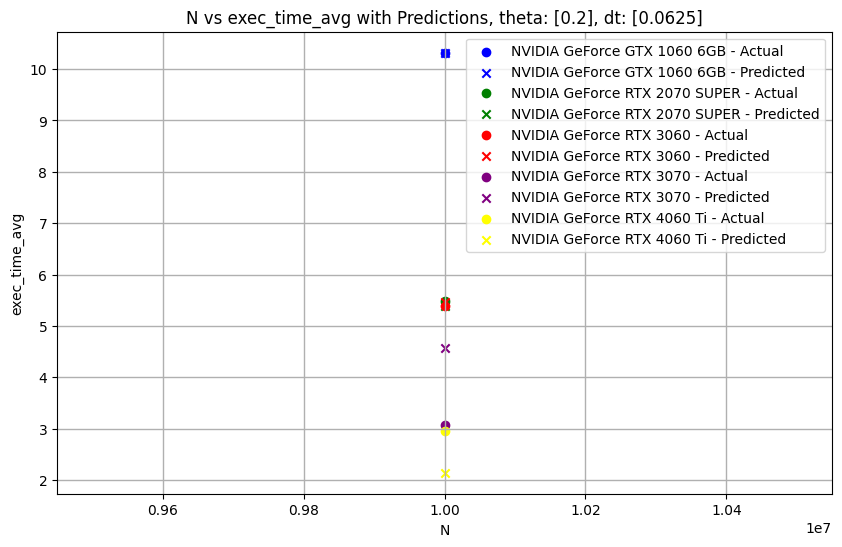

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

df = f_full.copy()
model = model_poly_final

# src = 'theta'
src = 'N'
target = 'exec_time_avg'

# Define the filter criteria
filter_criteria = {
    'N': [10000000],
    'theta': [0.2],
    'dt': [0.0625]
}

# Apply filtering based on the filter criteria
for feature, values in filter_criteria.items():
    df = df[df[feature].isin(values)]

# Add predictions to the filtered dataset
df['predicted_exec_time_avg'] = model.predict(df[selected_features])

# Group by a specific feature
grouped = df.groupby('Name')

# Plot X vs y for each group
colors = ['blue', 'green', 'red', 'purple', 'yellow']  # Specify colors for each group if known

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot X vs y with scatter points and connect them with dashed lines for each group
for (group_name, group_data), color in zip(grouped, colors):
    # Plot actual values
    ax.scatter(group_data[src], group_data[target], color=color, label=f'{group_name} - Actual')
    ax.plot(group_data[src], group_data[target], linestyle='--', color=color)  # Dashed line
    
    # Plot predicted values
    ax.scatter(group_data[src], group_data['predicted_exec_time_avg'], color=color, marker='x', label=f'{group_name} - Predicted')
    ax.plot(group_data[src], group_data['predicted_exec_time_avg'], linestyle='-', color=color)  # Solid line for predicted

# Add grid and logarithmic scales
ax.grid(linestyle='-', linewidth=1)
# ax.set_yscale("asinh")         # Logarithmic scale for y-axis

# Add labels, title, and legend
ax.set_xlabel(src)
ax.set_ylabel(target)
ax.set_title(f'{src} vs {target} with Predictions, theta: [0.2], dt: [0.0625]')
ax.legend()

# Set x and y limits to cover the range of points
# ax.set_xlim(df['I'].min() - 1, df['I'].max() + 1)
# ax.set_ylim(df['accumulated_error'].min() * 0.8, df['accumulated_error'].max() * 1.2)

plt.show()

## Input+GPU+prof Models

### Huber tests

In [60]:
from sklearn.linear_model import HuberRegressor

# Define dataset and parameters
input_features = ['N', 'theta', 'dt', 'Clock Rate (MHz)', 'L2 Cache Size (KB)', 
                  'Multiprocessors (SMs)', 'Half Precision FLOP/s', 'Single Precision FLOP/s', 
                  'Double Precision FLOP/s'] + selected_features
target_feature = 'exec_time_avg'

# Define the model pipeline
pipeline = Pipeline(steps=[
    ('normalize', PowerTransformer()),
    ('model', HuberRegressor())
])

# Wrap with TransformedTargetRegressor
model_huber_prof = TransformedTargetRegressor(
    regressor=pipeline, 
    transformer=QuantileTransformer()
)

# Define hyperparameter grid
model_params_huber_prof = {
    'regressor__model__epsilon': [1.35, 1.5, 1.75],
    'regressor__model__alpha': [0.0001, 0.001, 0.01],
}

In [61]:
# Run feature subset evaluation using Random CV
best_result_hr, res_hr = run_feature_subset_cv(
    f_full=f_full,
    input_features=input_features,
    target_feature=target_feature,
    model=model_huber_prof,
    model_params=model_params_huber_prof,
    output_folder="CV_results/input+GPU+prof",
    use_feature_subsets=True,
    use_gpu_cv=False  # Set to False to use regular KFold
)

# Display the best result
print("Best feature subset:", best_result_hr['features'])
print("Best parameters:", best_result_hr['best_params'])
print("Best MAE:", best_result_hr['best_mae'])
print("Best MAPE:", best_result_hr['best_mape'])

# Run feature subset evaluation using GPU split CV
best_result_hr, res_hr = run_feature_subset_cv(
    f_full=f_full,
    input_features=input_features,
    target_feature=target_feature,
    model=model_huber_prof,
    model_params=model_params_huber_prof,
    output_folder="CV_results/input+GPU+prof",
    use_feature_subsets=True,
    use_gpu_cv=True  # Set to False to use regular KFold
)

# Display the best result
print("Best feature subset:", best_result_hr['features'])
print("Best parameters:", best_result_hr['best_params'])
print("Best MAE:", best_result_hr['best_mae'])
print("Best MAPE:", best_result_hr['best_mape'])

KeyboardInterrupt: 

### SVR tests

In [ ]:
from sklearn.svm import SVR, LinearSVR

# Define dataset and parameters
input_features = ['N', 'theta', 'dt', 'Clock Rate (MHz)', 'L2 Cache Size (KB)', 
                  'Multiprocessors (SMs)', 'Half Precision FLOP/s', 'Single Precision FLOP/s', 
                  'Double Precision FLOP/s'] + selected_features
target_feature = 'exec_time_avg'

# Define the model pipeline
pipeline = Pipeline(steps=[
    ('normalize', PowerTransformer()),
    ('model', SVR())
])

# Wrap with TransformedTargetRegressor
model_svr_prof = TransformedTargetRegressor(
    regressor=pipeline, 
    transformer=QuantileTransformer()
)

# Define hyperparameter grid
model_params_svr_prof = {
    'regressor__model__C': [0.0001,0.001, 0.01, 0.1, 1, 10, 50,100],
    'regressor__model__epsilon': [0.00001,0.0001, 0.001, 0.01, 0.1, 0.5, 1], 
    'regressor__model__kernel': ['rbf']
}

In [ ]:
# Run feature subset evaluation using Random CV
best_result_svr, res_svr = run_feature_subset_cv(
    f_full=f_full,
    input_features=input_features,
    target_feature=target_feature,
    model=model_svr_prof,
    model_params=model_params_svr_prof,
    output_folder="CV_results/input+GPU+prof",
    use_feature_subsets=True,
    use_gpu_cv=False  # Set to False to use regular KFold
)

# Display the best result
print("Best feature subset:", best_result_svr['features'])
print("Best parameters:", best_result_svr['best_params'])
print("Best MAE:", best_result_svr['best_mae'])
print("Best MAPE:", best_result_svr['best_mape'])

# Run feature subset evaluation using GPU split CV
best_result_svr, res_svr = run_feature_subset_cv(
    f_full=f_full,
    input_features=input_features,
    target_feature=target_feature,
    model=model_svr_prof,
    model_params=model_params_svr_prof,
    output_folder="CV_results/input+GPU+prof",
    use_feature_subsets=True,
    use_gpu_cv=True  # Set to False to use regular KFold
)

# Display the best result
print("Best feature subset:", best_result_svr['features'])
print("Best parameters:", best_result_svr['best_params'])
print("Best MAE:", best_result_svr['best_mae'])
print("Best MAPE:", best_result_svr['best_mape'])


### DT tests

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Define dataset and parameters
input_features = ['N', 'theta', 'dt', 'Clock Rate (MHz)', 'L2 Cache Size (KB)', 
                  'Multiprocessors (SMs)', 'Half Precision FLOP/s', 'Single Precision FLOP/s', 
                  'Double Precision FLOP/s'] + selected_features
target_feature = 'exec_time_avg'

# Define the model pipeline
pipeline = Pipeline(steps=[
    ('normalize', PowerTransformer()),
    ('model', DecisionTreeRegressor())
])

# Wrap with TransformedTargetRegressor
model_dt_prof = TransformedTargetRegressor(
    regressor=pipeline, 
    transformer=QuantileTransformer()
)

# Define hyperparameter grid
model_params_dt_prof = {
    # 'regressor__model__n_estimators': [1,5,10,25,50, 100],
    'regressor__model__max_depth': [2,5,10, 20, None],
    'regressor__model__min_samples_split': [2, 5, 10],
    'regressor__model__min_samples_leaf': [1, 2, 4],
    'regressor__model__max_features': [0.2, 0.4, 0.6, 0.8, 1.0]
}

In [ ]:
# Run feature subset evaluation using Random CV
best_result_dt, res_dt = run_feature_subset_cv(
    f_full=f_full,
    input_features=input_features,
    target_feature=target_feature,
    model=model_dt_prof,
    model_params=model_params_dt_prof,
    output_folder="CV_results/input+GPU+prof",
    use_feature_subsets=True,
    use_gpu_cv=False  # Set to False to use regular KFold
)

# Display the best result
print("Best feature subset:", best_result_dt['features'])
print("Best parameters:", best_result_dt['best_params'])
print("Best MAE:", best_result_dt['best_mae'])
print("Best MAPE:", best_result_dt['best_mape'])

# Run feature subset evaluation using GPU split CV
best_result_dt, res_dt = run_feature_subset_cv(
    f_full=f_full,
    input_features=input_features,
    target_feature=target_feature,
    model=model_dt_prof,
    model_params=model_params_dt_prof,
    output_folder="CV_results/input+GPU+prof",
    use_feature_subsets=True,
    use_gpu_cv=True  # Set to False to use regular KFold
)

# Display the best result
print("Best feature subset:", best_result_dt['features'])
print("Best parameters:", best_result_dt['best_params'])
print("Best MAE:", best_result_dt['best_mae'])
print("Best MAPE:", best_result_dt['best_mape'])


### ERT tests

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

# Define dataset and parameters
input_features = ['N', 'theta', 'dt', 'Clock Rate (MHz)', 'L2 Cache Size (KB)', 
                  'Multiprocessors (SMs)', 'Half Precision FLOP/s', 'Single Precision FLOP/s', 
                  'Double Precision FLOP/s'] + selected_features
target_feature = 'exec_time_avg'

# Define the model pipeline
pipeline = Pipeline(steps=[
    ('normalize', PowerTransformer()),
    ('model', ExtraTreesRegressor())
])

# Wrap with TransformedTargetRegressor
model_ert_prof = TransformedTargetRegressor(
    regressor=pipeline, 
    transformer=QuantileTransformer()
)

# Define hyperparameter grid
model_params_ert_prof = {
    'regressor__model__n_estimators': [50, 100, 200, 300],        # Number of trees in the forest
    'regressor__model__max_depth': [10, 20, 30, None],
    'regressor__model__min_samples_split': [2], #, 5, 10
    'regressor__model__min_samples_leaf': [1], #, 2, 4
    'regressor__model__max_features': [0.2, 0.4, 0.6, 0.8, 1.0],
}

In [ ]:
# Run feature subset evaluation using Random CV
best_result_ert, res_ert = run_feature_subset_cv(
    f_full=f_full,
    input_features=input_features,
    target_feature=target_feature,
    model=model_ert_prof,
    model_params=model_params_ert_prof,
    output_folder="CV_results/input+GPU+prof",
    use_feature_subsets=True,
    use_gpu_cv=False  # Set to False to use regular KFold
)

# Display the best result
print("Best feature subset:", best_result_ert['features'])
print("Best parameters:", best_result_ert['best_params'])
print("Best MAE:", best_result_ert['best_mae'])
print("Best MAPE:", best_result_ert['best_mape'])

# Run feature subset evaluation using GPU split CV
best_result_ert, res_ert = run_feature_subset_cv(
    f_full=f_full,
    input_features=input_features,
    target_feature=target_feature,
    model=model_ert_prof,
    model_params=model_params_ert_prof,
    output_folder="CV_results/input+GPU+prof",
    use_feature_subsets=True,
    use_gpu_cv=True  # Set to False to use regular KFold
)

# Display the best result
print("Best feature subset:", best_result_ert['features'])
print("Best parameters:", best_result_ert['best_params'])
print("Best MAE:", best_result_ert['best_mae'])
print("Best MAPE:", best_result_ert['best_mape'])


### Poly ridge tests
* Best Random CV **(MAPE 0.0943):** CV_results/input+GPU/Ridge_Random_CV_results_1.json
* Best GPU CV **(MAPE 0.299):**  CV_results/input+GPU/Ridge_Random_CV_results_1.json

In [57]:
from sklearn.preprocessing import PowerTransformer, QuantileTransformer,FunctionTransformer,MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

# Define dataset and parameters
input_features = ['N', 'theta', 'dt', 'Clock Rate (MHz)', 'L2 Cache Size (KB)', 
                  'Multiprocessors (SMs)', 'Half Precision FLOP/s', 'Single Precision FLOP/s', 
                  'Double Precision FLOP/s'] + selected_features
target_feature = 'exec_time_avg'

# Define the model pipeline
pipeline = Pipeline(steps=[
    ('normalize', PowerTransformer()),
    # ('normalize', QuantileTransformer(n_quantiles=500)), # WORKS BETTER 
    ('poly', PolynomialFeatures()),   # PolynomialFeatures step
    ('model', Ridge())
])

# Wrap with TransformedTargetRegressor
model_poly_prof = TransformedTargetRegressor(
    regressor=pipeline, 
    transformer=QuantileTransformer() #n_quantiles=500
)

# Define hyperparameter grid
model_params_poly_prof = {
    'regressor__poly__degree': [2, 3, 4, 5], 
    'regressor__model__alpha': [0.0001, 0.001, 0.01,0.1,1],
}

In [58]:
# Run feature subset evaluation using Random CV
best_result_poly, res_poly = run_feature_subset_cv(
    f_full=f_full,
    input_features=input_features,
    target_feature=target_feature,
    model=model_poly_prof,
    model_params=model_params_poly_prof,
    use_feature_subsets=True,
    use_gpu_cv=False  # Set to False to use regular KFold
)

# Display the best result
print("Best feature subset:", best_result_poly['features'])
print("Best parameters:", best_result_poly['best_params'])
print("Best MAE:", best_result_poly['best_mae'])
print("Best MAPE:", best_result_poly['best_mape'])

# Run feature subset evaluation using Random CV
best_result_poly, res_poly = run_feature_subset_cv(
    f_full=f_full,
    input_features=input_features,
    target_feature=target_feature,
    model=model_poly_prof,
    model_params=model_params_poly_prof,
    use_feature_subsets=True,
    use_gpu_cv=True  # Set to False to use regular KFold
)

# Display the best result
print("Best feature subset:", best_result_poly['features'])
print("Best parameters:", best_result_poly['best_params'])
print("Best MAE:", best_result_poly['best_mae'])
print("Best MAPE:", best_result_poly['best_mape'])



Testing 134217727 feature subset(s)...


Progress:   0%|          | 0/134217727 [00:00<?, ?subset/s]

Custom Text:   0%|          | 0/134217727 [00:00<?, ?update/s]

KeyboardInterrupt: 